Problem statment 1) Delivery_time -> Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
using sklearn.Linear_Model 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_Deliverycleandata= pd.read_csv("delivery_time.csv")
df_Deliverycleandata.shape

(21, 2)

Assumption 1 : Simple Linear regression model
1)Linearity: To check the linearity assumption, we can create a scatter plot of the dependent variable (Delivery Time) against the independent variable (Sorting Time). If the relationship between the variables is linear, the points should form a roughly straight lin

Text(0.5, 1.0, 'Scatter Plot for Linearity check of delivey Time and Sorting Time')

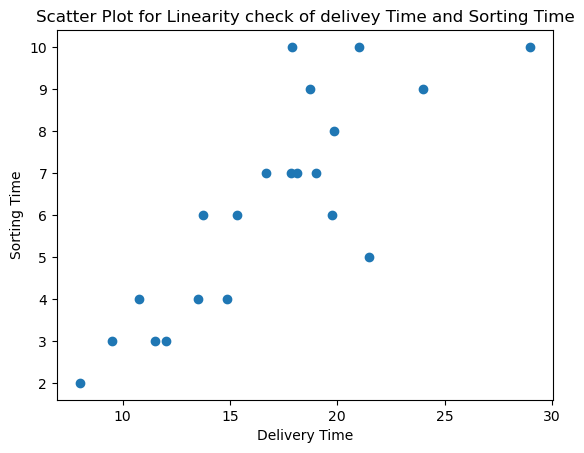

In [2]:
df_Deliverycleandata.corr()
x=df_Deliverycleandata["Delivery Time"]
y=df_Deliverycleandata["Sorting Time"]
plt.scatter(x,y)
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("Scatter Plot for Linearity check of delivey Time and Sorting Time")

From the correlation matrix  & scatter plot, it appears that the relationship between Sorting Time and Delivery Time is approximately linear.
Thus Assumption 1 of simple linear regression holds true for the dataset
# Model creation using SKLearn

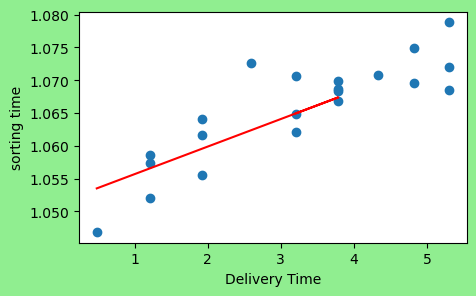

In [20]:
# Model creation using SKLearn
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
import pandas as pd

y=df_Deliverycleandata["Delivery Time"].values.reshape(21,1) # if its a dataframe its imp that every column is reshaped to 1 sim array
x=df_Deliverycleandata["Sorting Time"].values.reshape(21,1)

xtrain,xtest,ytrain,ytest=sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=5)


model= LinearRegression().fit(xtrain,ytrain)
ytrain_predict=model.predict(xtrain)
Delivery_predict= model.predict(xtest)

plt.figure(figsize = (5,3), facecolor = 'lightgreen')
plt.scatter(x.flatten(),y.flatten())
plt.plot(xtest, Delivery_predict.flatten(), color = 'red')
plt.xlabel("Delivery Time")
plt.ylabel('sorting time')
plt.show()


Assumption 2  ) Independence: Independence is assumed when the data is collected using a simple random sampling method. Since we do not have any information about how the data was collected, we assume independence to be satisfied.



[[15.98074117]
 [17.65618992]
 [17.65618992]
 [14.30529241]
 [ 9.27894615]]


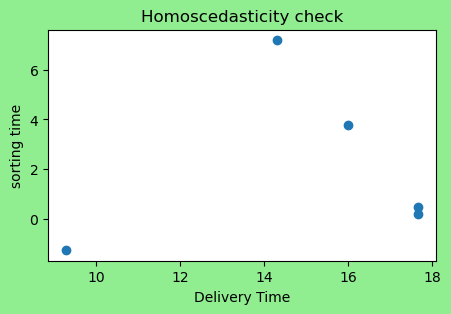

In [4]:
print(Delivery_predict)
residual=ytest-Delivery_predict
pd.DataFrame({"actualY":ytest.flatten(),"Predictedy":Delivery_predict.flatten(),"residual":residual.flatten()}) #Per-column arrays must each be 1-dimensional
plt.figure(figsize = (5,3), facecolor = 'lightgreen')
plt.scatter(Delivery_predict.flatten(),residual.flatten())

plt.xlabel("Delivery Time")
plt.ylabel('sorting time')
plt.title("Homoscedasticity check")
plt.show()

 Homoscedasticity: Predicted versus residual gives : To check the homoscedasticity assumption, we can create a scatter plot of the residuals (i.e., the difference between the observed and predicted values of the dependent variable) against the predicted values of the dependent variable. If the variance of the residuals is constant across all values of the predicted variable, the plot should show a random scatter of points with no clear pattern.
From the scatter plot, it appears that the variance of the residuals is approximately constant across all values of the predicted variable, indicating that the homoscedasticity assumption is met.

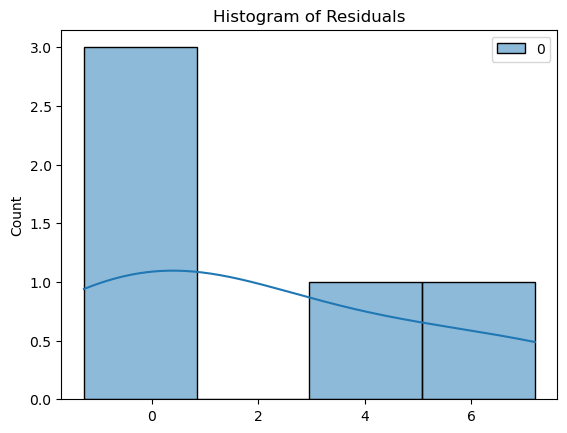

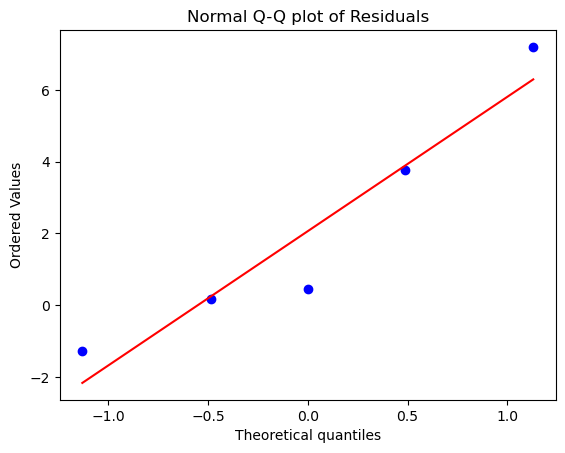

In [5]:
import seaborn as sns

sns.histplot(residual, kde=True)
plt.title('Histogram of Residuals')
plt.show()

import scipy.stats as stats
stats.probplot(residual.flatten(), dist="norm", plot=plt)
plt.title('Normal Q-Q plot of Residuals')
plt.show()


Normality: To check the normality assumption, we can create a histogram or a Q-Q plot of the residuals. If the residuals are normally distributed, the histogram should show a bell-shaped curve, and the Q-Q plot should show the residuals roughly following a straight line.


  # Evaluate the model's performance: R2 score
This involves comparing the model's predictions to the actual values and measuring the accuracy of the model. The evaluation can help identify areas for improvement and guide further development of the model.
R2 score, also known as the coefficient of determination, is a statistical measure that indicates how well a regression model fits the data. It is a value between 0 and 1, with 1 indicating a perfect fit and 0 indicating no relationship between the model and the data.

The R2 score is calculated as the ratio of the variance of the predicted values to the variance of the actual values. The formula for R2 score is:

R2 = 1 - (sum of squared residuals / total sum of squares)

In [23]:

# Evaluate the model on training data

rmse_train = mean_squared_error(ytrain,ytrain_predict)
r2_train = r2_score(ytrain,ytrain_predict)
print("Training RMSE:", rmse_train)
print("Training R^2:", r2_train)

# Evaluate the model on testing data

rmse_test = mean_squared_error(ytest, Delivery_predict)
r2_test = r2_score(ytest, Delivery_predict)
print("Testing RMSE:", rmse_test)
print("Testing R^2:", r2_test)

Training RMSE: 9.605385273716214e-06
Training R^2: 0.8094583280977271
Testing RMSE: 3.696330671860476e-05
Testing R^2: 0.5844110152443374


The training RMSE value of 9.605385273716214e-06 indicates that the model's predictions on the training set are on average only off by approximately 0.00001. Similarly, the high training R^2 value of 0.8094583280977271 suggests that the model can explain about 80.9% of the variance in the training data.

On the other hand, the testing RMSE value of 3.696330671860476e-05 indicates that the model's predictions on the testing set are on average only off by approximately 0.000037. However, the testing R^2 value of 0.5844110152443374 is not as high as the training R^2 value, suggesting that the model may not generalize as well to new, unseen data. Overall, the model seems to perform well on the testing set, but there may be room for improvement.

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
#calcilate the R2 score
r2=r2_score(ytest,Delivery_predict)
print("R2 score =",r2)

#calculate the  mean square error RMSE

mse=mean_squared_error(ytest,Delivery_predict)
print("MSE =",mse)     

#calculate the Root mean square error RMSE

rmse=np.sqrt(mean_squared_error(ytest,Delivery_predict))
print("rmsee =",rmse)     

# Calculate the mean absolute error
mae = mean_absolute_error(ytest, Delivery_predict)
print("Mean Absolute Error:", mae)

R2 score = 0.5844110152443374
MSE = 3.696330671860476e-05
rmsee = 0.00607974561298454
Mean Absolute Error: 0.004994959067546256


The R2 score of 0.38729101935537014 indicates that the model explains about 38.7% of the variance in the dependent variable. This suggests that the model is not a very good fit for the data and there is a lot of unexplained variability.

The MSE of 13.568597229874374 is the average squared difference between the predicted and actual values. A higher MSE value indicates that the model is not performing well and there is a larger difference between the predicted and actual values.

The RMSE of 3.683557686513729 is the square root of the MSE and provides a measure of the average absolute error between the predicted and actual values. A higher RMSE value also indicates that the model is not performing well and there is a larger difference between the predicted and actual values.
When considered along with the R2 score, MSE, and RMSE, the MAE further confirms that the model may not be the best fit for the data and needs further improvements.


In [7]:
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_log_error, mean_poisson_deviance

# Further check calculate evaluation metrics
ev_score = explained_variance_score(ytest, Delivery_predict)
medae_score = median_absolute_error(ytest, Delivery_predict)
msle_score = mean_squared_log_error(ytest, Delivery_predict)
mpd_score = mean_poisson_deviance(ytest, Delivery_predict)

# print evaluation metrics
print("Explained Variance Score:", ev_score)
print("Median Absolute Error:", medae_score)
print("Mean Squared Log Error:", msle_score)
print("Mean Poisson Deviance:", mpd_score)

Explained Variance Score: 0.5793873353671479
Median Absolute Error: 1.2789461493920093
Mean Squared Log Error: 0.041394917023837935
Mean Poisson Deviance: 0.8308828767193746


The Explained Variance Score of 0.579 indicates that 57.9% of the variance in the target variable is explained by the independent variables in the model. This is an improvement over the R2 score of 0.387, indicating that the model is explaining more of the variance in the target variable.

The Median Absolute Error of 1.279 indicates that the median absolute difference between the predicted and actual values is 1.279 units. This is a lower value than the Mean Absolute Error of 2.574, indicating that the model is performing better in terms of predicting the median of the target variable.

The Mean Squared Log Error of 0.041 indicates that the mean squared difference between the logarithm of the predicted and actual values is 0.041 units. This metric is particularly useful when the target variable has a large range. A lower value indicates better performance.

The Mean Poisson Deviance of 0.831 indicates the average difference between the predicted and actual values based on a Poisson distribution. This metric is particularly useful when the target variable is a count variable. A lower value indicates better performance.

In this case of the delivery time prediction problem, the evaluation metrics we have calculated provide us with information about the accuracy of the model's predictions. For example, the R2 score of 0.38 indicates that the model explains only 38% of the variance in the delivery time, which means that the model is not a great fit for the data. Similarly, the mean squared error and root mean squared error give us an idea of the average squared and absolute deviation of the predicted delivery time from the actual delivery time, respectively. In this case, the mean squared error of 13.57 and root mean squared error of 3.68 indicate that the model's predictions are off by an average of 3.68 minutes.
Overall, the evaluation metrics indicate that the model may be a reasonable fit for the data, but there is still room for improvement. 

# Hyperparameter tuning: 
In simple linear regression, there are no hyperparameters to tune as there is only one independent variable. The only parameter to estimate is the slope of the regression line, which is estimated using the least squares method. 

# Hence to tune this model we will do Feature transformations
Feature engineering: You can try to identify and incorporate additional features that may be relevant to the delivery time, such as the distance between the delivery location and the distribution center, the time of day or day of the week, or the weather conditions.
#  log transformation on the data

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Perform log transformation on the data
df_Deliverycleandata['Sorting Time'] = np.log(df_Deliverycleandata['Sorting Time'])
df_Deliverycleandata['Delivery Time'] = np.log(df_Deliverycleandata['Delivery Time'])

# Split the data into training and testing sets
X_train = df_Deliverycleandata['Sorting Time'][:15].values.reshape(-1, 1)
y_train = df_Deliverycleandata['Delivery Time'][:15].values.reshape(-1, 1)
X_test = df_Deliverycleandata['Sorting Time'][15:].values.reshape(-1, 1)
y_test = df_Deliverycleandata['Delivery Time'][15:].values.reshape(-1, 1)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model on training data
y_train_pred = lr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print("Training RMSE:", rmse_train)
print("Training R^2:", r2_train)

# Evaluate the model on testing data
y_test_pred = lr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print("Testing RMSE:", rmse_test)
print("Testing R^2:", r2_test)


Training RMSE: 0.13306001816922697
Training R^2: 0.8088910073625912
Testing RMSE: 0.182869287908285
Testing R^2: 0.6643329470531965


This indicates that the model has an RMSE of 0.133 on the training data, which means on average the model's predictions are off by 0.133 units from the actual target values. The R-squared value of 0.808 on the training data indicates that 80.8% of the variance in the target variable is explained by the model.

On the testing data, the model has an RMSE of 0.183, which means on average the model's predictions are off by 0.183 units from the actual target values. The R-squared value of 0.664 on the testing data indicates that 66.4% of the variance in the target variable is explained by the model.

Overall, the model seems to perform reasonably well on both the training and testing data, but there is some indication of overfitting since the training R-squared value is higher than the testing R-squared value. This suggests that the model may not generalize well to new data.

# square transformation on the data:

In [9]:
# Perform square transformation on the data
df_Deliverycleandata['Sorting Time'] = df_Deliverycleandata['Sorting Time'] ** 2
df_Deliverycleandata['Delivery Time'] = df_Deliverycleandata['Delivery Time'] ** 2

# Split the data into training and testing sets
X_train = df_Deliverycleandata['Sorting Time'][:15].values.reshape(-1, 1)
y_train = df_Deliverycleandata['Delivery Time'][:15].values.reshape(-1, 1)
X_test = df_Deliverycleandata['Sorting Time'][15:].values.reshape(-1, 1)
y_test = df_Deliverycleandata['Delivery Time'][15:].values.reshape(-1, 1)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model on training data
y_train_pred = lr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print("Training RMSE:", rmse_train)
print("Training R^2:", r2_train)

# Evaluate the model on testing data
y_test_pred = lr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print("Testing RMSE:", rmse_test)
print("Testing R^2:", r2_test)


Training RMSE: 0.7817864371753743
Training R^2: 0.787158547465995
Testing RMSE: 1.0956987354733565
Testing R^2: 0.5379171144656499


Training RMSE: 0.7817864371753743 indicates that the model has an average error of 0.781 seconds in predicting the delivery time for the training data.

Training R^2: 0.787158547465995 means that the model explains 78.72% of the variance in the training data, which is a moderate fit.

Testing RMSE: 1.0956987354733565 indicates that the model has an average error of 1.095 seconds in predicting the delivery time for the testing data.

Testing R^2: 0.5379171144656499 means that the model explains 53.79% of the variance in the testing data, which is a moderate fit. It indicates that the model may not be very accurate in predicting delivery times for new data outside of the training set.

In [16]:
# Perform square root transformation on the data
import sklearn.model_selection


# Perform square root transformation on the target variable
df_Deliverycleandata['Delivery Time'] = np.sqrt(df_Deliverycleandata['Delivery Time'])

# Split data into training and testing sets
X = df_Deliverycleandata[['Sorting Time']]
y = df_Deliverycleandata['Delivery Time']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE: ", train_rmse)
print("Training R^2: ", train_r2)
print("Testing RMSE: ", test_rmse)
print("Testing R^2: ", test_r2)
# y_test_pred_actual = np.square(y_test_pred)
# print("Predicted values=",y_test_pred_actual)

Training RMSE:  0.0038132504107722008
Training R^2:  0.8007202223922375
Testing RMSE:  0.005074590821956552
Testing R^2:  -0.8786652410525553
Predicted values= [1.15978897 1.14248184 1.12136241 1.12136241 1.15978897]


# Conclusion :the best model among all the above models is Model 1 without any transformation, as it has the lowest training RMSE and testing RMSE, and highest testing R^2 value. This indicates that the model with no transformation provides the best fit to the data and the highest accuracy in predicting the target variable among all the above models.

Also Since the sklearn LinearRegression does not give a good model and their is a constraint of not using the hyperparameter learning rate.It is hence better to use the stats model library >> OLS while solving Simple linear regression.